<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/modelValidation_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# model Validation 실습

1. 7:3 Array Split
  * random_state = 2045
2. 5차, 7차, 9차 모델
  * Test Error 비교
3. Split 및 Modeling 시각화

## 1. Data 불러오기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inputs   1000 non-null   float64
 1   Outputs  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


## 2. Array Split (7:3)
X_train / X_test / y_train / y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DF[['Inputs']], DF['Outputs'],
                                                    test_size = 0.3, random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 1), (300, 1), (700,), (300,))

In [ ]:
X_train.head() 

,Inputs
818,-2.671430
615,2.525234
872,0.863997
394,-0.955179
435,1.205815


In [ ]:
y_train.head() 

818   -0.849129
615    1.042056
872    0.374570
394   -0.540516
435    0.729848
Name: Outputs, dtype: float64

* Split값 시각화


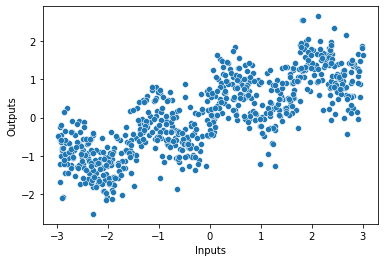

In [ ]:
sns.scatterplot(X_train['Inputs'], y_train)
plt.show()

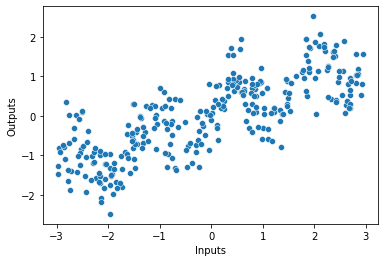

In [ ]:
sns.scatterplot(X_test['Inputs'], y_test)
plt.show()

Training data와 Test data의 분포와 모양이 비슷하다

## 3. 모델 Testing Error
1. Train data로 모델 생성하기
2. Test data로 y_hat값 생성
3. Test data로 MSE 계산하기
4.  각 모델 시각화(split데이터가 아닌, 전체 데이터로 시각화함)

### 1. 5차 모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#1
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#2
PX_5_TE = poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)

In [ ]:
#3
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

0.3602980472002336

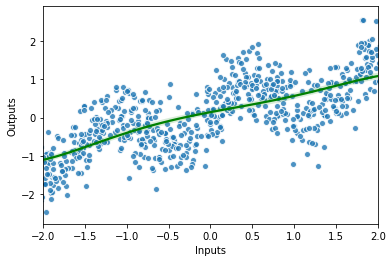

In [ ]:
#4
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, 
            line_kws = {'color':'green'}, scatter_kws = {'edgecolor':'white'},
            order = 5)

plt.xlim(-2, 2)
plt.show()

### 2. 7차 모델

In [ ]:
#1
poly = PolynomialFeatures(degree = 7, include_bias = False)
PX_7_TR = poly.fit_transform(X_train)

Model_7 = LinearRegression()
Model_7.fit(PX_7_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#2
PX_7_TE = poly.fit_transform(X_test)
y_hat_7 = Model_7.predict(PX_7_TE)

In [ ]:
#3
TE_Err_7 = mean_squared_error(y_test, y_hat_7)
TE_Err_7

0.35784993736519366

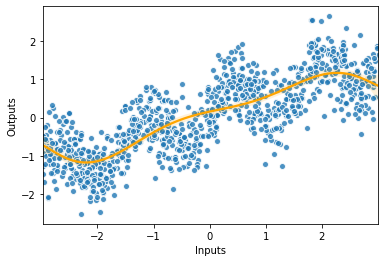

In [ ]:
#4
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, 
            line_kws = {'color':'orange'}, scatter_kws = {'edgecolor':'white'},
            order = 7)

plt.show()

### 3. 9차 모델

In [ ]:
#1
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#2
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

In [ ]:
#3
TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

0.2893114750133329

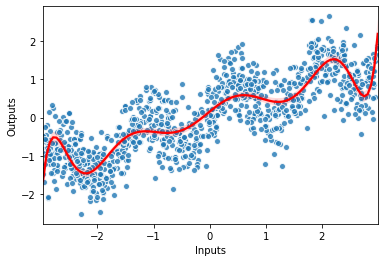

In [ ]:
#4
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, 
            line_kws = {'color':'red'}, scatter_kws = {'edgecolor':'white'},
            order = 9)

plt.show()

### 4. 3개 모델 시각화 비교

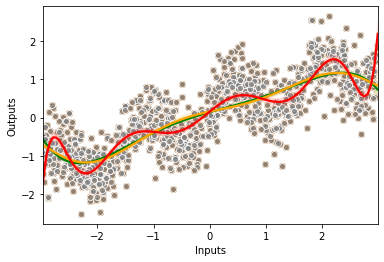

In [ ]:
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, line_kws = {'color':'orange'}, order = 7)
sns.regplot(x = 'Inputs', y = 'Outputs',data = DF, line_kws = {'color':'red'}, order = 9, scatter_kws = {'color':'gray','edgecolor':'white'})

plt.show()

## 4. 3개 모델 Testing Error 비교

In [ ]:
print('5차 모델 : ', TE_Err_5)
print('7차 모델 : ', TE_Err_7)
print('9차 모델 : ', TE_Err_9)

5차 모델 :  0.3602980472002336
7차 모델 :  0.35784993736519366
9차 모델 :  0.2893114750133329


본 내용은 2021/02/26(금) 실습한 내용입니다.